In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
!pip install kaggle
!mkdir ~/.kaggle
!mkdir ./.kaggle
import json
token = {"username":"batoulalhasanii","key":"d64ad2a6a3bc41ebf8776ed83f582bec"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘./.kaggle’: File exists
- path is now set to: {/content}


In [0]:
!kaggle competitions download -c otto-group-product-classification-challenge


sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip ./{/content}/competitions/otto-group-product-classification-challenge/train.csv.zip

Archive:  ./{/content}/competitions/otto-group-product-classification-challenge/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [0]:
data = pd.read_csv('train.csv')

In [0]:
print("Number of missing values in training set:", sum(data.isnull().sum()))
data=data.dropna()

Number of missing values in training set: 0


In [0]:
print("Number of missing values in training set:", sum(data.isnull().sum()))

Number of missing values in training set: 0


In [0]:
target = data[["target"]].copy()
data = data.drop(["id","target"], axis=1)
data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [0]:
target['target'] = target['target'].str.replace('Class_', '')
target['target'] = pd.to_numeric(target['target'], errors='coerce')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(49502, 93)
(49502, 1)
(12376, 93)
(12376, 1)


In [0]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

mlp = MLPClassifier()
mlp.fit(x_train,y_train)
pred_mlp = mlp.predict(x_test)
accuracy_score(y_test, pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7811893988364577

In [0]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
accuracy_score(y_test, pred_knn)

0.7807045895281189

In [0]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
accuracy_score(y_test, pred_svc)

0.7677763413057531

In [0]:
r_forest = RandomForestClassifier(n_estimators=50,n_jobs=-1)
r_forest.fit(x_train,y_train)
pred_r_forest = r_forest.predict(x_test)
accuracy_score(y_test, pred_r_forest)

0.8093083387201034

In [0]:
xgb = XGBClassifier(num_class = 9,objective="multi:softprob",eval_metric="mlogloss")
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, pred_xgb)


0.7722204266321914

In [0]:
# It is not possible to plot ROC curve as it doesn't support multiclass calssification

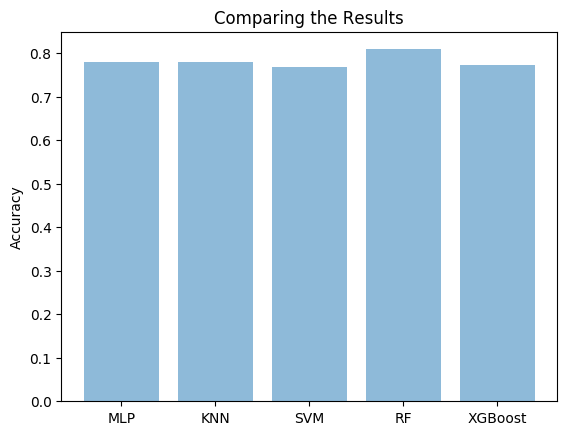

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('MLP', 'KNN', 'SVM', 'RF', 'XGBoost')
y_pos = np.arange(len(objects))
performance = [accuracy_score(y_test, pred_mlp),accuracy_score(y_test, pred_knn),accuracy_score(y_test, pred_svc),accuracy_score(y_test, pred_r_forest),accuracy_score(y_test, pred_xgb)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparing the Results')

plt.show()

In [0]:
#Random forest has highest accuracy 0.8093083387201034